# Actividad sobre regresión lineal

### Autor: Edwin Leonardo Buitrago Ch.

## Contenido

* Introducción
* Historia
* Planteamiento del algoritmo
* Ejemplos practicos
* Conclusiones

## Introducción

En el siguiente cuaderno de jupyter encontraremos información general sobre la aplicación del modelo matemático de regresión lineal para los casos simples y múltiples, se presentará una breve contextualización de su historia y de como surge este modelo que permite usado para aproximar la relación de dependencia entre una variable dependiente $Y$, para $m$ variables independientes $X_{i}$, que se verá mejor contextualizado con un ejemplo que busca estimar el valor de una vivienda para una ciudad en estados unidos según una serie de datos recopilados sobre las viviendas, y por último, daremos unas conclusiones frente a la implementación y los resultados sobre la aplicación de este modelo.

## Historia del modelo de regresión lineal

Como se puede observar en [Wikipedia](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal), la historia sobre el modelo de regresión lineal fue expuesto sobre el método de los mínimos cuadrados publicado por [Legendre](https://es.wikipedia.org/wiki/Adrien-Marie_Legendre) en 1805, sin embargo, [Gauss](https://es.wikipedia.org/wiki/Carl_Friedrich_Gauss) publicó un trabajo en donde desarrollaba de manera más profunda el método de los mínimos cuadrados.

El método de mínimos cuadrados ordinaries minimiza la suma de los residuales al cuadrado para todas las observaciones, buscando encontrar la función continua que mejor se aproxime a los datos, lo anterior se conoce como la línea que mejor se ajusta a los datos. En su forma más simple, intenta minimizar la suma de cuadrados de las diferencias en las ordenadas (llamadas residuos) entre los puntos generados por la función elegida y los correspondientes valores en los datos. Específicamente, se llama mínimos cuadrados promedio (LMS) cuando el número de datos medidos es 1 y se usa el método de descenso por gradiente para minimizar el residuo cuadrado. Se puede demostrar que LMS minimiza el residuo cuadrado esperado, con el mínimo de operaciones (por iteración), pero requiere un gran número de iteraciones para converger. 

Habitualmente, se hace uso de modelo de regresión lineal cuando una variable dependiente $Y$ es una variable de resultado que queremos explicar usando otras variables $X_{i}$. Las variables independientes son las variables que usamos para “explicar” la variación en la variable dependiente.

### Ejemplo de regresión lineal ![Ejemplo de una regresión lineal](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1280px-Linear_regression.svg.png)

## Planteamiento del algoritmo

 la representación de la relación entre dos (o más) variables a través de un modelo formal supone contar con una expresión lógico-matemática que, aparte de resumir cómo es esa relación, va a permitir realizar predicciones de los valores que tomará una de las dos variables, la que se asuma como variable de respuesta, a partir de los valores de la que se
asuma como variable explicativa.

El modelo lineal relaciona la variable dependiente $Y$ con $m$ variables regresoras $X_{j}$ con $j=1,2,\dots m$  o cualquier transformación de éstas que generen un hiperplano de parámetros $\beta _{i}$ desconocidos:

### $$h_\beta(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \varepsilon_{i}$$

- $Y$ es la variable dependiente
- $\beta_0$ es el intercepto
- $\beta_1$ es el coeficiente para $x_1$ (la primera variable regresora)
- $\beta_n$ es el coeficiente para $x_n$ (las e-nesimas variables regresoras)
- $\varepsilon_{i}$ es el error del modelo

El método de mínimos cuadrados, encuentra los estimadores de los parámetros $\beta_{0}$ y $\beta_{1}$ tal que la suma de cuadrados de los residuales (diferencias entre el valor observado de $Y$ y el valor estimado $\widehat{Y}_{i}$) sea mínima. Para la aplicación del método de mínimos cuadrados se debe:

1. Definir la suma de cuadrados del error

$$SC_{Error} = S(\beta_0,\beta_1) = \sum_{i}^n \varepsilon^2 = \sum_{i}^n (Y_{i}-\beta_0-\beta_{1}X_{i})$$

### Mínimos cuadrados ![Minimos cuadrados](https://www.researchgate.net/profile/Olman_Gomez-Espinoza2/publication/311548169/figure/fig1/AS:614257926352896@1523461910284/Figura-3-Representacion-de-los-minimos-cuadrados.png)

2. Obtener la derivada de la suma de cuadrados del error con respecto a cada parámetro del modelo; es decir $\frac{\partial S}{\partial \beta_0}$ y $\frac{\partial S}{\partial \beta_1}$

3. Igualar las derivadas a cero y simplificar (se debe sustituir $\beta_{0}$ y $\beta_{1}$ por sus respectivos estimadores $b_{0}$ y $b_{1}$)

#### $$-2 \sum_{i}^n (Y_{i}-b_{0}-b_{1}X_{i} = 0$$
#### $$-2 \sum_{i}^n X_i(Y_{i}-b_{0}-b_{1}X_{i} = 0$$

4. Solucionar el sistema de ecuaciones o ecuaciones normales lo que arroja una solución de $b_{0}$ y $b_{1}$

#### $$b_0 = \bar Y  - b_1\bar X $$
#### $$\bar Y = b_0 + b_{1}X$$


Sin embargo, para los siguientes ejemplos practicos, implementaremos la solución matricial bajo la siguiente formula para minimizar el error cuadratico medio (MCO) para la estimación de los parámetros $\beta$ como se presenta a continuación:

#### $$\beta = (X^T X)^{-1} X^T Y$$

## Ejemplo practico 

### Regresión Lineal Simple

In [1]:
### Librerías de trabajo

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [55]:
## Lectura de datos con pandas

data = pd.read_csv('houses_portland.csv')
data.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Text(0, 0.5, 'Price')

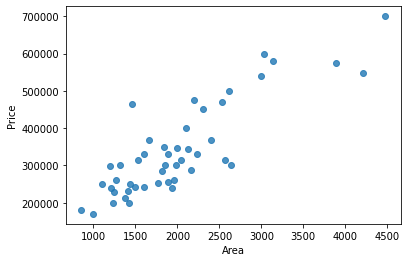

In [56]:
### Variables con las que se trabajara el modelo de regresión lineal simple

y = data[' price'].values
X = data['area'].values
plt.scatter(X, y, alpha = 0.8)
plt.xlabel('Area')
plt.ylabel('Price')

#### Normalización del conjunto de datos 

Se implementara la siguiente normalización de los datos entendiendo que la variable Price y Area tienen magnitudes muy diferentes, por lo que aplicaremos la siguiente formula a las variables con la que se realizará el modelo.

## $$ x = \frac{x -\overline x}{\sigma_x} $$ 

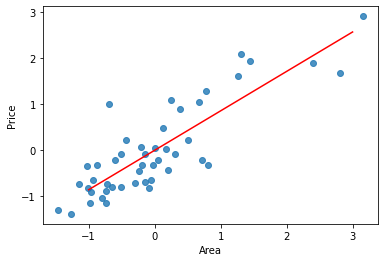

In [75]:
y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y_norm = np.array((y - y_mean)/ y_std)
X_norm = np.array((X - X_mean)/ X_std)

plt.scatter(X_norm, y_norm, alpha = 0.8)
plt.xlabel('Area')
plt.ylabel('Price')

## Añadiremos la columna de unos para la estimación de beta_0

X_norm = np.array([np.ones(np.shape(data)[0]),X_norm]).T

B = np.linalg.inv(X_norm.T @ X_norm) @ X_norm.T @ y_norm

## Dibujar la linea recta con los parámetros de Beta estimados

plt.plot([-1,3],[B[0]+B[1]*(-1), B[0] + B[1]*3], c="red")
plt.show()

In [71]:
## Estimación de los parámetros de beta

print(B)

[-7.97972799e-17  8.54987593e-01]
